# Regularization:

**GOAL**: Reduce complexity of your model. AKA Prevent Overfitting. AKA Reduce Variance.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings; warnings.simplefilter('ignore')
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

Let's try to create some data that roughly follows this equation:


$$ y = \sqrt x $$


Add in some normally-distributed noise to make it a bit more interesting.

In [40]:
X = np.arange(0, 100, 5)
y = [np.sqrt(x_val) + np.random.normal(0, 0.7) for x_val in X]

In [41]:
y

[0.3693853478480206,
 2.0175289589318246,
 2.8110332442704324,
 3.967169516509889,
 4.431825788564785,
 5.023599894763437,
 6.210779278882421,
 5.642315238261474,
 7.253194449716788,
 6.793199895601998,
 7.1240125131549785,
 8.354975903583576,
 7.9155255154773325,
 7.838155176828645,
 7.563532933282593,
 8.941494862729279,
 9.724000529975958,
 9.511382029215573,
 9.168022034020325,
 8.969400196889868]

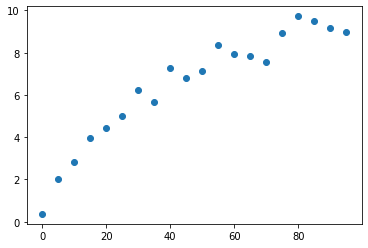

In [42]:
plt.scatter(X, y)

### Always SCALE THE DATA for Regularization

In [43]:
scaler = StandardScaler()

In [44]:
X = scaler.fit_transform(X.reshape(-1, 1))

In [8]:
X

array([[-1.64750894],
       [-1.47408695],
       [-1.30066495],
       [-1.12724296],
       [-0.95382097],
       [-0.78039897],
       [-0.60697698],
       [-0.43355498],
       [-0.26013299],
       [-0.086711  ],
       [ 0.086711  ],
       [ 0.26013299],
       [ 0.43355498],
       [ 0.60697698],
       [ 0.78039897],
       [ 0.95382097],
       [ 1.12724296],
       [ 1.30066495],
       [ 1.47408695],
       [ 1.64750894]])

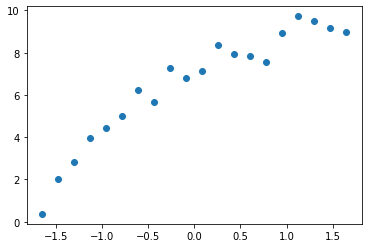

In [45]:
plt.scatter(X, y)

### Now let's intentionally overfit a model that focuses too much on training examples.

In [10]:
#Create more features to create a model that is too complex
poly = PolynomialFeatures(degree=12, include_bias=False) 
X = X.reshape(-1,1)
X_poly = poly.fit_transform(X) 

In [12]:
X_poly.shape

(20, 12)

In [19]:
# Train a Linear Regression
m = LinearRegression()
m.fit(X_poly, y)
ypred = m.predict(X_poly)

In [20]:
ypred

array([-0.22862475,  2.24709983,  4.1920391 ,  3.1079462 ,  3.39232859,
        4.76522409,  5.73449223,  6.01252898,  6.16409259,  6.56007669,
        7.07379447,  7.47638971,  7.78793696,  8.14831731,  8.49714563,
        8.66366112,  8.86933957,  9.5530794 ,  9.74375462,  8.89416757])

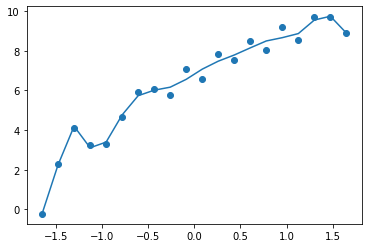

In [22]:
plt.scatter(X, y)
plt.plot(X, ypred)

## Another extreme case:
- Generate similar data but purposely throw in some outliers.

In [23]:
X = np.linspace(0, 15, 15).reshape(-1, 1)
y = [np.sqrt(x_val) + np.random.normal(0,0.1) for x_val in X]

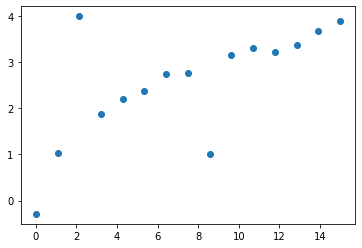

In [24]:
# Create some outliers
y[2] = 4
y[8] = 1

plt.scatter(X, y)

#### And watch how the Linear Regression model overfits:

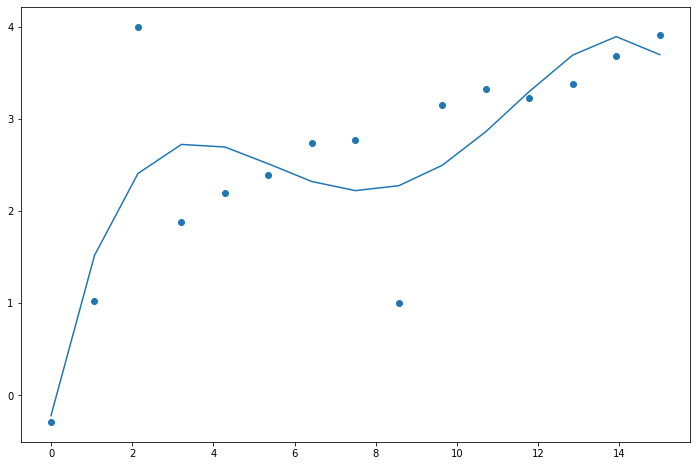

In [25]:
### Make model unnecessarily complex:
poly = PolynomialFeatures(degree=4, include_bias=False )
X_poly = poly.fit_transform(X)

##Fit Linear Regression
m = LinearRegression() 
m.fit(X_poly, y)  
ypred = m.predict(X_poly)

## Plot
plt.figure(figsize=(12, 8))
plt.scatter(X, y)
plt.plot(X, ypred)

## We can reduce this complexity through Regularization

There are three models that we can use for this purpose: 
- Ridge
- Lasso 
- ElasticNet  


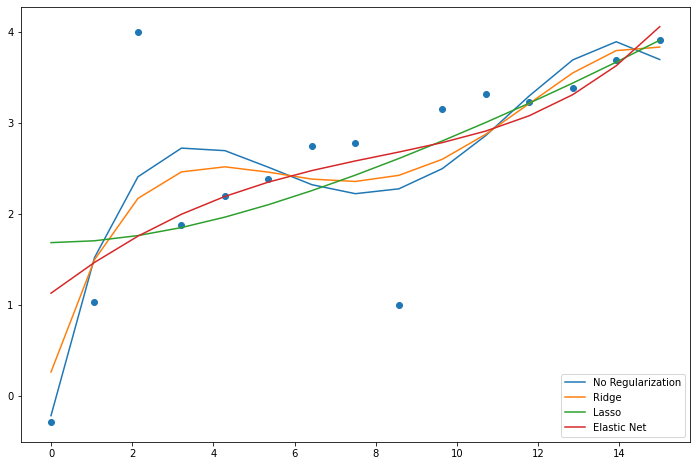

In [39]:
m = LinearRegression() 
m_ridge = Ridge(alpha=0.5) 
m_lasso = Lasso(alpha=0.5)
m_elastic = ElasticNet(alpha=0.3, l1_ratio=0.2)  #L1: Lasso, L2: Ridge

m.fit(X_poly, y)       
m_ridge.fit(X_poly, y)  
m_lasso.fit(X_poly, y)  
m_elastic.fit(X_poly, y)  

ypred = m.predict(X_poly)
ypred_ridge = m_ridge.predict(X_poly)
ypred_lasso = m_lasso.predict(X_poly)
ypred_elastic = m_elastic.predict(X_poly)

plt.figure(figsize=(12, 8))
plt.scatter(X, y)
plt.plot(X, ypred, label='No Regularization')
plt.plot(X, ypred_ridge, label='Ridge')
plt.plot(X, ypred_lasso, label='Lasso')
plt.plot(X, ypred_elastic, label ='Elastic Net')
plt.legend()

**Inspect Coefficients**

In [36]:
X_poly

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [1.07142857e+00, 1.14795918e+00, 1.22995627e+00, 1.31781029e+00],
       [2.14285714e+00, 4.59183673e+00, 9.83965015e+00, 2.10849646e+01],
       [3.21428571e+00, 1.03316327e+01, 3.32088192e+01, 1.06742633e+02],
       [4.28571429e+00, 1.83673469e+01, 7.87172012e+01, 3.37359434e+02],
       [5.35714286e+00, 2.86989796e+01, 1.53744534e+02, 8.23631430e+02],
       [6.42857143e+00, 4.13265306e+01, 2.65670554e+02, 1.70788213e+03],
       [7.50000000e+00, 5.62500000e+01, 4.21875000e+02, 3.16406250e+03],
       [8.57142857e+00, 7.34693878e+01, 6.29737609e+02, 5.39775094e+03],
       [9.64285714e+00, 9.29846939e+01, 8.96638120e+02, 8.64615330e+03],
       [1.07142857e+01, 1.14795918e+02, 1.22995627e+03, 1.31781029e+04],
       [1.17857143e+01, 1.38903061e+02, 1.63707179e+03, 1.92940604e+04],
       [1.28571429e+01, 1.65306122e+02, 2.12536443e+03, 2.73261141e+04],
       [1.39285714e+01, 1.94005102e+02, 2.70221392e

In [33]:
m_lasso.coef_

array([ 0.00000000e+00,  1.86931181e-02, -8.78183477e-04,  1.94524542e-05])

In [34]:
m.coef_

array([ 2.11379272e+00, -5.06357059e-01,  4.59223559e-02, -1.35994481e-03])

In [35]:
m_ridge.coef_

array([ 1.47351201e+00, -3.30216686e-01,  2.90763985e-02, -8.36804788e-04])

In [37]:
m.intercept_

-0.2206727903669239

In [38]:
m_lasso.intercept_

1.6823233751072115

Good visual explanation of why Ridge doesn't shrink coefficients to 0, but Lasso does: 
https://www.youtube.com/watch?v=Xm2C_gTAl8c